# 2023 인공지능연구회 강습회 실습
# (강사: 숙명여자대학교 심주용 - 2023.08.16)
# Lab2: CNN, Transfer Learning


# 1.CNN with TensorFlow (MNIST)
- MNIST example
- To classify handwritten digits

 ![GT](https://raw.githubusercontent.com/jooyongsim/AI_tutorials_2023/main/photos/cnn3.png)

## 1.1. Training


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 6]

mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (28, 28, 1)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (14, 14, 32)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units = 128, activation = 'relu'),

    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
model.fit(train_x, train_y, batch_size = 50, epochs = 3)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/3
1200/1200 [==============================] - 21s 6ms/step - loss: 0.1458 - accuracy: 0.9561
Epoch 2/3
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0444 - accuracy: 0.9860
Epoch 3/3
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0311 - accuracy: 0.9904


## 1.2. Testing or Evaluating

1/1 [==============================] - 0s 111ms/step


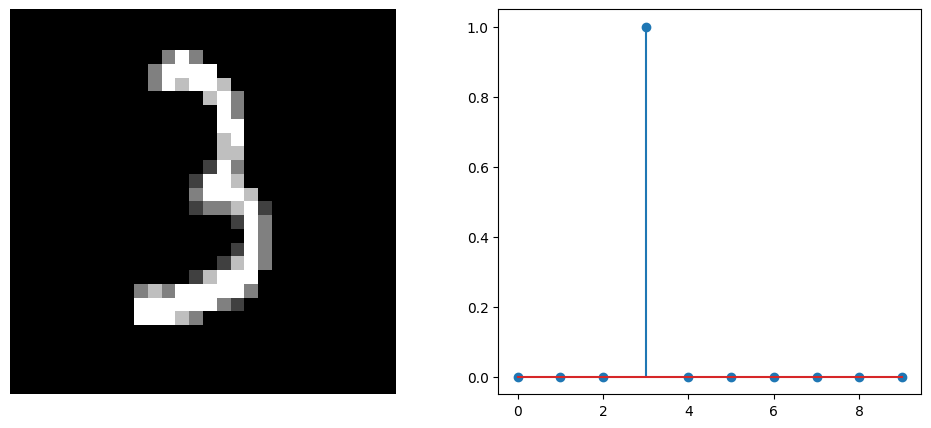

Prediction : 3


In [2]:
test_loss, test_acc = model.evaluate(test_x, test_y)

test_img = test_x[[1495]]

predict = model.predict(test_img)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))

# 2.Pretrained Models

## 2.1. List of Available Models
- VGG16
- VGG19
- ResNet
- GoogLeNet/Inception
- DenseNet
- MobileNet


In [3]:
# model_type = tf.keras.applications.densenet
# model_type = tf.keras.applications.inception_resnet_v2
# model_type = tf.keras.applications.inception_v3
model_type = tf.keras.applications.mobilenet
# model_type = tf.keras.applications.mobilenet_v2
# model_type = tf.keras.applications.nasnet
# model_type = tf.keras.applications.resnet50
# model_type = tf.keras.applications.vgg16
# model_type = tf.keras.applications.vgg19

In [4]:
model = model_type.MobileNet() # Change Model (hint : use capital name)

model.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

## 2.2 Test with ImageNet

- Load pretrained models

https://www.tensorflow.org/api_docs/python/tf/keras/applications

--2023-08-15 22:20:07--  https://raw.githubusercontent.com/jooyongsim/AI_tutorials_2023/main/photos/ILSVRC2017_test_00005381.JPEG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109753 (107K) [image/jpeg]
Saving to: ‘ILSVRC2017_test_00005381.JPEG’

ILSVRC2017_test_000 100%[===================>] 107.18K  --.-KB/s    in 0.007s  

2023-08-15 22:20:07 (14.4 MB/s) - ‘ILSVRC2017_test_00005381.JPEG’ saved [109753/109753]

(500, 333, 3)


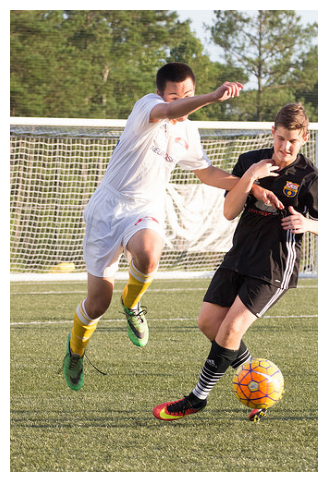

In [6]:
!wget https://raw.githubusercontent.com/jooyongsim/AI_tutorials_2023/main/photos/ILSVRC2017_test_00005381.JPEG

fn = 'ILSVRC2017_test_00005381.JPEG'
# import cv2
# img = cv2.imread(fn)
# print(img.shape)
# img = img[:,:,::-1] # BGR -> RGB

img = tf.keras.utils.load_img(fn)
img = tf.keras.utils.img_to_array(img).astype('int')
print(img.shape)

plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

## 2.3 Preprocess Images and Predict class

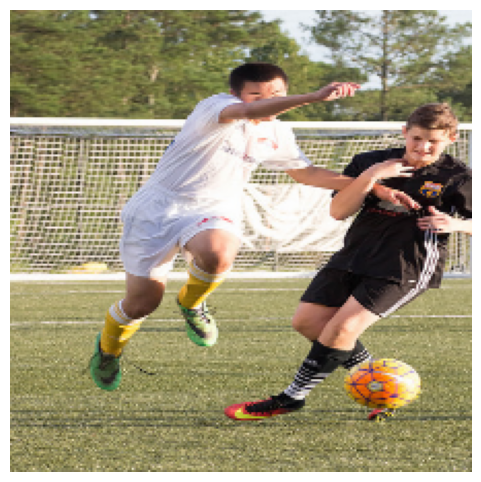

In [7]:
img_rs = tf.image.resize(img,(224,224))

plt.figure()
plt.imshow(tf.cast(img_rs, tf.int32))
plt.axis('off')
plt.show()

In [8]:
img.shape, img_rs.shape, tf.reduce_mean(img_rs), tf.math.reduce_max(img_rs), tf.math.reduce_min(img_rs)

((500, 333, 3),
 TensorShape([224, 224, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=136.90054>,
 <tf.Tensor: shape=(), dtype=float32, numpy=255.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>)

In [9]:
img_pr = model_type.preprocess_input(img_rs)
img_pr = tf.expand_dims(img_pr,0)

img_pr.shape, tf.reduce_mean(img_pr), tf.math.reduce_std(img_pr),

(TensorShape([1, 224, 224, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=0.07372972>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.47633913>)

In [10]:
tf.math.reduce_max(img_pr), tf.math.reduce_min(img_pr)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.0>)

In [11]:
pred = model.predict(img_pr)
label = model_type.decode_predictions(pred)[0]

print('%s (%.2f%%)\n' % (label[0][1], label[0][2]*100))
print('%s (%.2f%%)\n' % (label[1][1], label[1][2]*100))
print('%s (%.2f%%)\n' % (label[2][1], label[2][2]*100))
print('%s (%.2f%%)\n' % (label[3][1], label[3][2]*100))
print('%s (%.2f%%)\n' % (label[4][1], label[4][2]*100))

35363/35363 [==============================] - 0s 0us/step
soccer_ball (96.91%)

tennis_ball (1.66%)

racket (0.38%)

rugby_ball (0.36%)

knee_pad (0.16%)



# 3.Transfer Learning

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pretrained model as is or use transfer learning to customize this model to a given task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

In this notebook, you will try two ways to customize a pretrained model:

1. Feature Extraction: Use the representations learned by a previous network to extract meaningful features from new samples. You simply add a new classifier, which will be trained from scratch, on top of the pretrained model so that you can repurpose the feature maps learned previously for the dataset.

    You do not need to (re)train the entire model. The base convolutional network already contains features that are generically useful for classifying pictures. However, the final, classification part of the pretrained model is specific to the original classification task, and subsequently specific to the set of classes on which the model was trained.

2. Fine-Tuning: Unfreeze a few of the top layers of a frozen model base and jointly train both the newly-added classifier layers and the last layers of the base model. This allows us to "fine-tune" the higher-order feature representations in the base model in order to make them more relevant for the specific task.

참고: https://www.tensorflow.org/guide/keras/transfer_learning

## 3.1 Prepare small dataset

- Use very small dataset


In [ ]:
!wget https://www.dropbox.com/s/5xu7jg6d8c5wy26/transfer_learning_lecture_data_files.zip
!unzip transfer_learning_lecture_data_files.zip


train_imgs:  (65, 224, 224, 3)
test_imgs:  (9, 224, 224, 3)
train labels:  [1. 0. 0. 0. 0.]


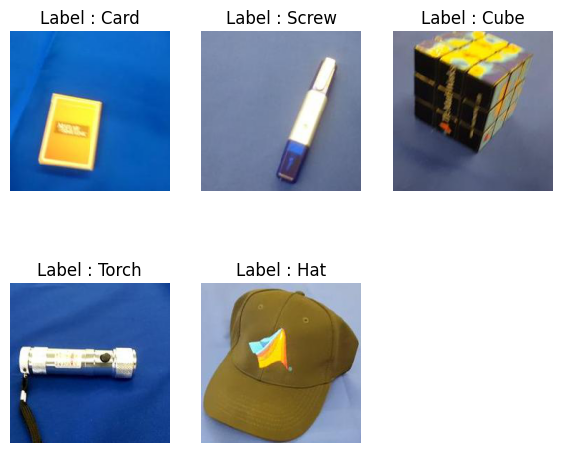

In [18]:
train_imgs = np.load('target_images.npy')
train_labels = np.load('target_labels.npy')
test_imgs = np.load('test_images.npy')
test_labels = np.load('test_labels.npy')

print('train_imgs: ', train_imgs.shape)
print('test_imgs: ', test_imgs.shape)
print('train labels: ', train_labels[0]) # one-hot-encoded 5 classes

# remove one-hot-encoding
train_labels = np.argmax(train_labels, axis = 1)
test_labels = np.argmax(test_labels, axis = 1)

n_train = train_imgs.shape[0]
n_test = test_imgs.shape[0]

Dict = ['Hat','Cube','Card','Torch','Screw']

plt.figure()
plt.subplot(2,3,1)
plt.imshow(train_imgs[1])
plt.title("Label : {}".format(Dict[train_labels[1]]))
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(train_imgs[2])
plt.title("Label : {}".format(Dict[train_labels[2]]))
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(train_imgs[3])
plt.title("Label : {}".format(Dict[train_labels[3]]))
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow(train_imgs[18])
plt.title("Label : {}".format(Dict[train_labels[18]]))
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(train_imgs[25])
plt.title("Label : {}".format(Dict[train_labels[25]]))
plt.axis('off')
plt.show()

## 3.2  Load VGG16 Model

![](https://raw.githubusercontent.com/jooyongsim/AI_tutorials_2023/main/photos/vgg16.png)

In [13]:
model_type = tf.keras.applications.vgg16
base_model = model_type.VGG16()
base_model.trainable = False
base_model.summary()

553467096/553467096 [==============================] - 18s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

## 3.3 Testing for Target Data

1/1 [==============================] - 1s 598ms/step
mosquito_net (6.94%)
toilet_tissue (3.43%)
Band_Aid (1.53%)
envelope (1.46%)
shower_curtain (1.39%)


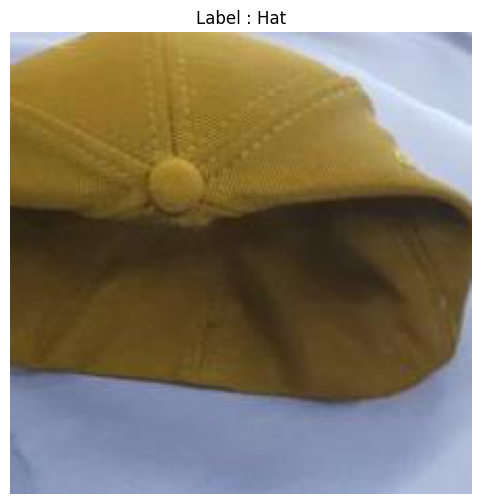

In [14]:
idx = np.random.randint(n_test)
pred = base_model.predict(test_imgs[idx].reshape(-1, 224, 224, 3))
label = model_type.decode_predictions(pred)[0]

print('%s (%.2f%%)' % (label[0][1], label[0][2]*100))
print('%s (%.2f%%)' % (label[1][1], label[1][2]*100))
print('%s (%.2f%%)' % (label[2][1], label[2][2]*100))
print('%s (%.2f%%)' % (label[3][1], label[3][2]*100))
print('%s (%.2f%%)' % (label[4][1], label[4][2]*100))

plt.figure(figsize = (6,6))
plt.imshow(test_imgs[idx])
plt.title("Label : {}".format(Dict[test_labels[idx]]))
plt.axis('off')
plt.show()

## 3.4. Build a Transfer Learning Model

In [15]:
# replace new and trainable classifier layer
fc2_layer = base_model.layers[-2].output
output = tf.keras.layers.Dense(units = 5, activation = 'softmax')(fc2_layer)

# define new model
model = tf.keras.Model(inputs = base_model.inputs, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 3.5. Define Loss and Optimizer

In [16]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
model.fit(train_imgs, train_labels, batch_size = 10, epochs = 10)

Epoch 1/10
7/7 [==============================] - 2s 86ms/step - loss: 2.2941 - accuracy: 0.1538
Epoch 2/10
7/7 [==============================] - 0s 20ms/step - loss: 1.8588 - accuracy: 0.3077
Epoch 3/10
7/7 [==============================] - 0s 20ms/step - loss: 1.3036 - accuracy: 0.3692
Epoch 4/10
7/7 [==============================] - 0s 21ms/step - loss: 1.0925 - accuracy: 0.5538
Epoch 5/10
7/7 [==============================] - 0s 21ms/step - loss: 0.9709 - accuracy: 0.6769
Epoch 6/10
7/7 [==============================] - 0s 19ms/step - loss: 0.8565 - accuracy: 0.6769
Epoch 7/10
7/7 [==============================] - 0s 21ms/step - loss: 0.6722 - accuracy: 0.8154
Epoch 8/10
7/7 [==============================] - 0s 20ms/step - loss: 0.5096 - accuracy: 0.9385
Epoch 9/10
7/7 [==============================] - 0s 21ms/step - loss: 0.5298 - accuracy: 0.9231
Epoch 10/10
7/7 [==============================] - 0s 19ms/step - loss: 0.4491 - accuracy: 0.9231


## 3.6. Test and Evaluate

1/1 [==============================] - 0s 239ms/step


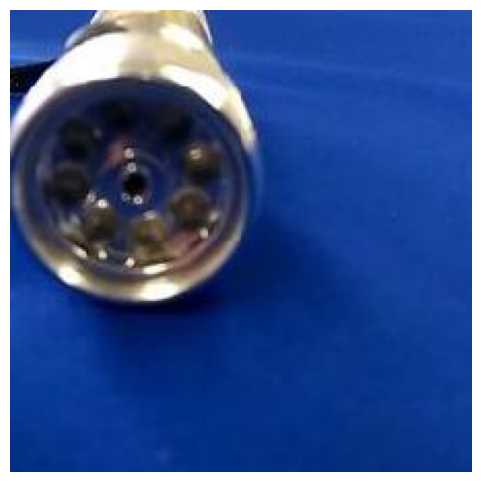

Prediction : Torch


In [17]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

# test_x = random.choice(test_imgs).reshape(-1,224,224,3)
test_x = test_imgs[np.random.choice(n_test, 1)]
pred = np.argmax(model.predict(test_x))

plt.figure(figsize = (6,6))
plt.imshow(test_x.reshape(224, 224, 3))
plt.axis('off')
plt.show()

print('Prediction : {}'.format(Dict[pred]))